#Table of Contents
* [Movielens 1M](#Movielens-1M)
* [Movielens 10M](#Movielens-10M)


In [1]:
import pandas as pd
from polara.evaluation.plotting import *
from polara.evaluation import evaluation_engine as ee
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.3)
sns.set_style('white')
mpl.rcParams['text.usetex'] = True #Type1 Fonts

In [2]:
RESULTS_DIR = 'results'
EXPERIMENT_NAME = 'ACM'
ERR_ALPHA = 0.1

In [3]:
def get_results(data_name, results_dir, experiment, metric, test_sample):
    path_tmpl = "{}/{}_{}_({{}})_{{}}.csv".format(results_dir, data_name, experiment)
    filepath = path_tmpl.format(test_sample, metric)
    data = pd.read_csv(filepath, header=[0, 1], index_col=[0, 1])
    res, err = ee.average_results({metric:data})
    return res, err

def format_plots(ax):
    handles = {}
    labels = {}
    colors = {}
    for i, axi in enumerate(ax):
        axi.set_ylim(ymin=0)

        handles[i], labels[i] = axi.get_legend_handles_labels()
        handle = handles[i]
        if i == 0:
            for j in range(len(handle)):
                colors[j] = handle[j].get_color()
        else:
            for j in range(len(handle)):
                handle[j].set_color(colors[j])
        labels[i], handles[i] = zip(*sorted(zip(labels[i], handles[i]), key=lambda t: t[0]))

    for i, lable in enumerate(labels):
        labels[i] = [name if name!='mostpopular' else 'most popular' for name in labels[i]]

def format_labels(ax):
    ax[2].set_xlabel('top-$n$')
    ax[3].set_xlabel('top-$n$')
    ax[2].set_ylabel('nDCG@$n$')
    ax[3].set_ylabel('nDCL@$n$')
    ax[1].set_xlabel('Recall@$n$')
    ax[1].set_ylabel('Precision@$n$')

def show_results(data_name, results_dir, experiment, test_sample):
    res, err = get_results(data_name, results_dir, experiment, 'relevance', test_sample)
    resr, errr = get_results(data_name, results_dir, experiment, 'ranking', test_sample)
    fig, ax = plt.subplots(1, 4, figsize=(16, 3))

    show_hit_rates(res, errors=err, err_alpha=ERR_ALPHA, ax=ax[0], ROC_middle=True);
    show_precision_recall(res, errors=err, err_alpha=ERR_ALPHA, ax=ax[1])
    show_ranking(resr, errors=errr, err_alpha=ERR_ALPHA, ax=(ax[2], ax[3]))

    format_plots(ax)
    format_labels(ax)

    fig.legend(*ax[3].get_legend_handles_labels(), loc='upper left', bbox_to_anchor=(1,0.8))
    plt.tight_layout()

# Movielens 1M

In [4]:
data_name = 'ml-1m'

C:\Users\evfro\Anaconda\envs\scicomp2x\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


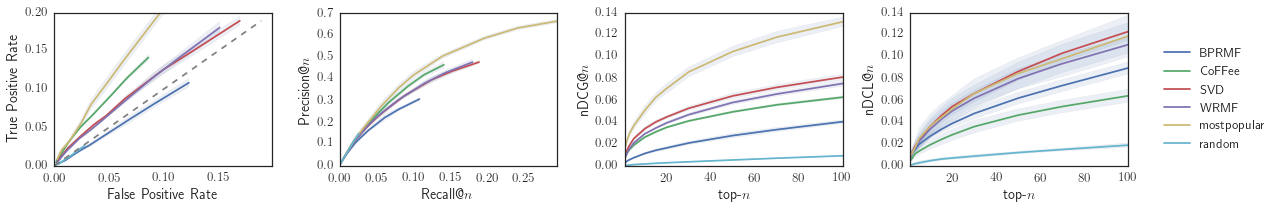

In [5]:
test_sample = -1
show_results(data_name, RESULTS_DIR, EXPERIMENT_NAME, test_sample)

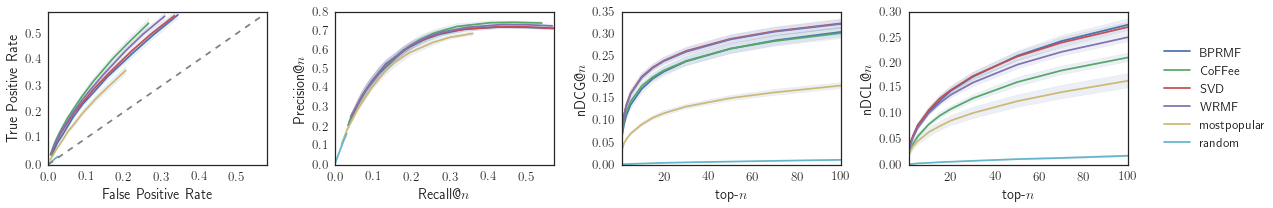

In [6]:
test_sample = 0
show_results(data_name, RESULTS_DIR, EXPERIMENT_NAME, test_sample)

# Movielens 10M

In [7]:
data_name = 'ml-10m'

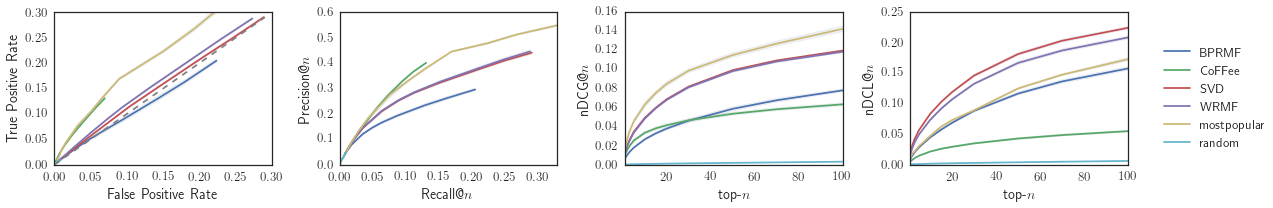

In [8]:
test_sample = -1
show_results(data_name, RESULTS_DIR, EXPERIMENT_NAME, test_sample)

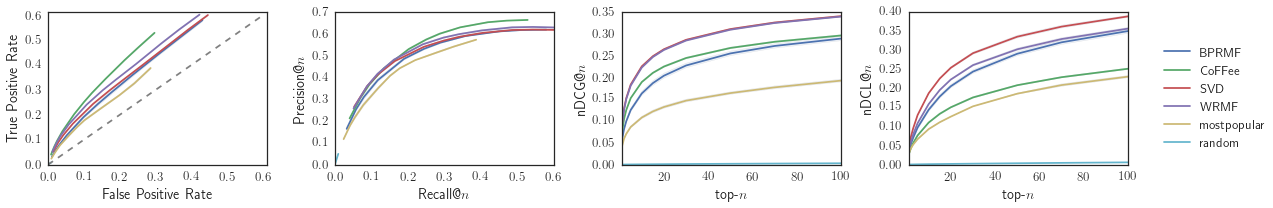

In [9]:
test_sample = 0
show_results(data_name, RESULTS_DIR, EXPERIMENT_NAME, test_sample)